In [10]:
!pip install tensorflow matplotlib



In [11]:
import tensorflow as tf
from tensorflow.keras import datasets

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [12]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.3499 - loss: 1.7565 - val_accuracy: 0.5550 - val_loss: 1.2389
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.5714 - loss: 1.2049 - val_accuracy: 0.6159 - val_loss: 1.1060
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6381 - loss: 1.0294 - val_accuracy: 0.6584 - val_loss: 0.9699
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6712 - loss: 0.9323 - val_accuracy: 0.6796 - val_loss: 0.9109
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7030 - loss: 0.8446 - val_accuracy: 0.6789 - val_loss: 0.9342
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7218 - loss: 0.7870 - val_accuracy: 0.6860 - val_loss: 0.8994
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7442 - loss: 0.7341 - val_accuracy: 0.7045 - val_loss: 0.8667
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7500 -

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n✅ Test Accuracy:", test_acc)


313/313 - 3s - 11ms/step - accuracy: 0.6964 - loss: 0.8969

✅ Test Accuracy: 0.696399986743927


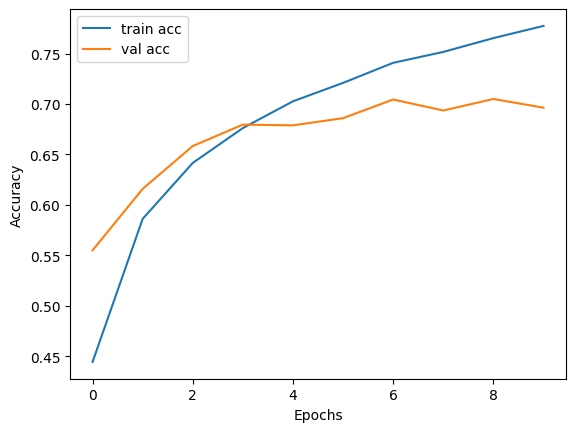

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


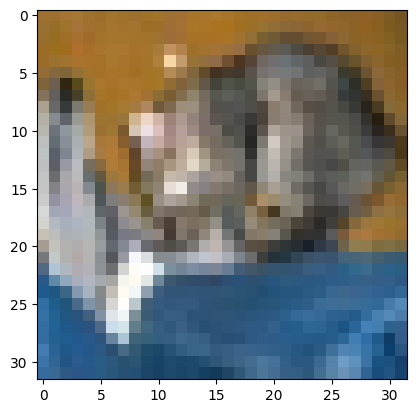

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted: cat
Actual: cat


In [17]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Pick a test image
i = 0
plt.imshow(x_test[i])
plt.show()

pred = model.predict(np.expand_dims(x_test[i], axis=0))
print("Predicted:", class_names[np.argmax(pred)])
print("Actual:", class_names[y_test[i][0]])
